In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
# Read the CSV file with low_memory=False
movies_data = pd.read_csv(r"C:\Users\Magda\OneDrive\Documents\Flatiron\joined_movies.csv", low_memory=False)
movies_data

,title,studio,domestic_gross,foreign_gross,year,Unnamed: 0,popularity,genres
0,Toy Story 3,BV,415000000.0,652000000.0,2010,NaN,NaN,NaN
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,NaN,NaN,NaN
3,Inception,WB,292600000.0,535700000.0,2010,NaN,NaN,NaN
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
181825,Kuambil Lagi Hatiku,NaN,NaN,NaN,2019,NaN,NaN,Drama
181826,Rodolpho Teóphilo - O Legado de um Pioneiro,NaN,NaN,NaN,2015,NaN,NaN,Documentary
181827,Dankyavar Danka,NaN,NaN,NaN,2013,NaN,NaN,Comedy
181828,6 Gunn,NaN,NaN,NaN,2017,NaN,NaN,NaN


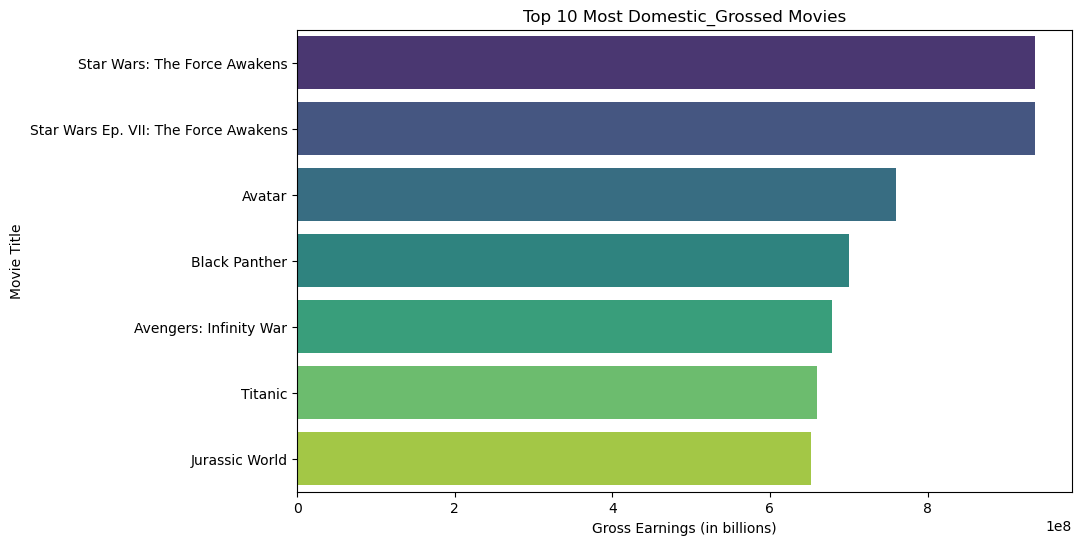

In [3]:
#Getting the top 10 most grossed domestic movies.
# Sort the DataFrame by gross in descending order
sorted_movies = movies_data.sort_values(by='domestic_gross', ascending=False)

# Take the top 10 most domestic grossed movies
top_10_grossed_movies = sorted_movies.head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='domestic_gross', y='title', data=top_10_grossed_movies, palette='viridis')
plt.xlabel('Gross Earnings (in billions)')
plt.ylabel('Movie Title')
plt.title('Top 10 Most Domestic_Grossed Movies')
plt.show()

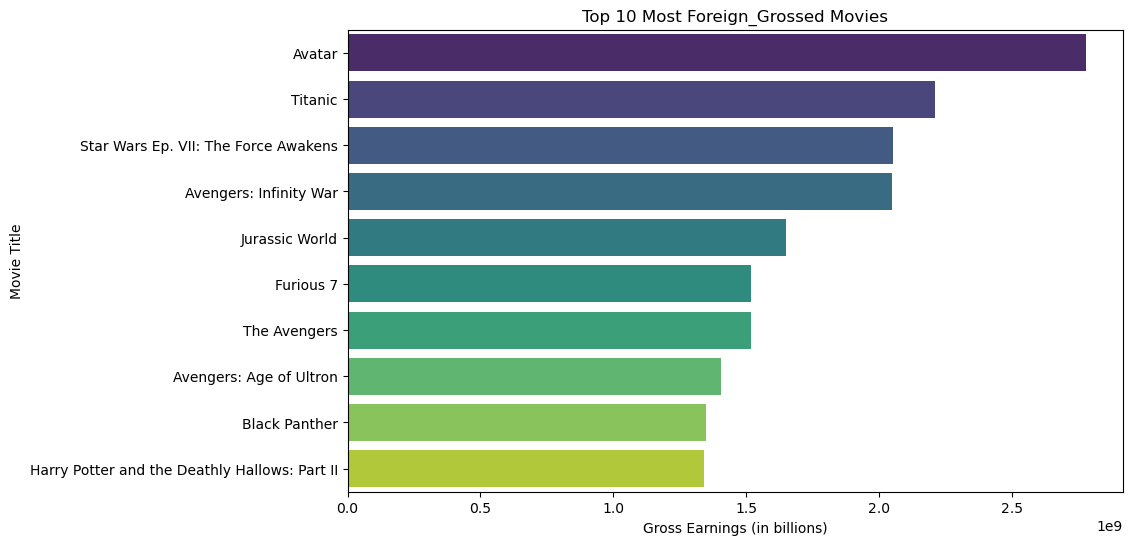

In [4]:
#Getting the top 10 most foreign  movies.
# Sort the DataFrame by gross in descending order
sorted_movies = movies_data.sort_values(by='foreign_gross', ascending=False)

# Take the top 10 most domestic grossed movies
top_10_grossed_movies = sorted_movies.head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='foreign_gross', y='title', data=top_10_grossed_movies, palette='viridis')
plt.xlabel('Gross Earnings (in billions)')
plt.ylabel('Movie Title')
plt.title('Top 10 Most Foreign_Grossed Movies')
plt.show()

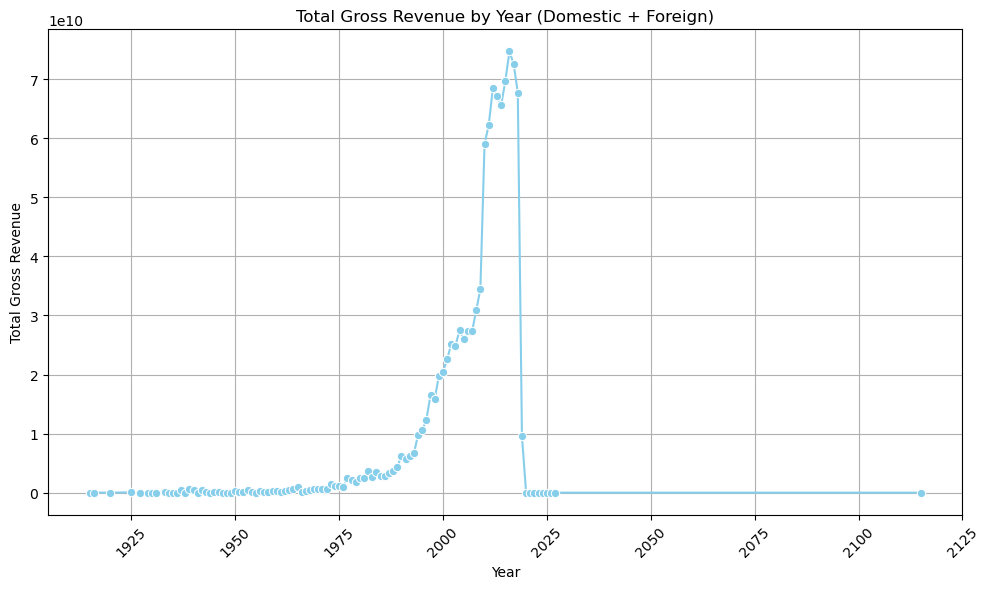

In [5]:
# Calculate total gross revenue by summing domestic gross and foreign gross
movies_data['total_gross'] = movies_data['domestic_gross'] + movies_data['foreign_gross']

# Convert 'title_year' column to datetime
movies_data['year'] = pd.to_datetime(movies_data['year'], format='%Y')

# Group by year and calculate total gross revenue for each year
revenue_by_year = movies_data.groupby(movies_data['year'].dt.year)['total_gross'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=revenue_by_year, x='year', y='total_gross', marker='o', color='skyblue')
plt.title('Total Gross Revenue by Year (Domestic + Foreign)')
plt.xlabel('Year')
plt.ylabel('Total Gross Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
"""
The visualization shows the trend of total gross revenue (combining both domestic and foreign gross) over the years. 
Here are some observations and comments based on the plot:

1. Overall Trend: The plot illustrates the general trend of total gross revenue over the years. 
By examining the trend, you can observe the total revenue was stagnated for a while then started increasing, over time.

2.Yearly Variations: You may notice fluctuations in the total gross revenue from year to year. 
    These variations could be influenced by various factors such as the release of blockbuster movies, 
    economic conditions, changes in audience preferences, or shifts in the global film industry.

3. Growth Patterns: From 1920s to about 1970 there was not growth at all in the movie industry. This changed significantly from
1970 to 2019. The drop was caused by the pandemic in 2020 COVID-19. before CoVID there was tremendous growth in the movie 
industry.
    
4. Outliers: From the 1970s many people started appreciating watching movies at the movie studio hence the increase on revenue 
steadily through the years till the pandemic hit in 2020.

5. Long-term Perspective: Investing in a movie studio is recommended as from apart from the pandemic time, there was steady 
increase in the movie industry and the revenue was coming in big time.

Overall, this visualization provides a valuable overview of the total gross revenue trends in the movie industry, 
helping stakeholders make informed decisions regarding investment, strategic planning, and market positioning.
"""

'\nThe visualization shows the trend of total gross revenue (combining both domestic and foreign gross) over the years. \nHere are some observations and comments based on the plot:\n\n1. Overall Trend: The plot illustrates the general trend of total gross revenue over the years. \nBy examining the trend, you can observe the total revenue was stagnated for a while then started increasing, over time.\n\n2.Yearly Variations: You may notice fluctuations in the total gross revenue from year to year. \n    These variations could be influenced by various factors such as the release of blockbuster movies, \n    economic conditions, changes in audience preferences, or shifts in the global film industry.\n\n3. Growth Patterns: From 1920s to about 1970 there was not growth at all in the movie industry. This changed significantly from\n1970 to 2019. The drop was caused by the pandemic in 2020 COVID-19. before CoVID there was tremendous growth in the movie \nindustry.\n    \n4. Outliers: From the 1

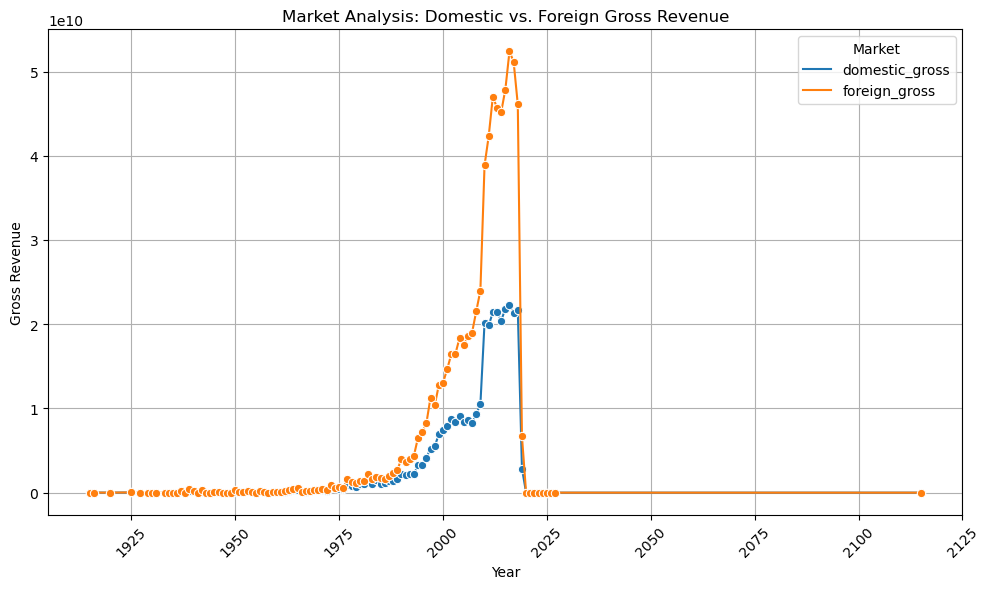

In [7]:
# Convert 'title_year' column to datetime
#movies_data['year'] = pd.to_datetime(movies_data['year'], format='%Y')

# Group by year and calculate total domestic and foreign gross revenue for each year
market_analysis = movies_data.groupby(movies_data['year'].dt.year)[['domestic_gross', 'foreign_gross']].sum().reset_index()

# Melt the DataFrame to long format for visualization
market_analysis_melted = market_analysis.melt(id_vars=['year'], var_name='Market', value_name='Gross Revenue')

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=market_analysis_melted, x='year', y='Gross Revenue', hue='Market', marker='o')
plt.title('Market Analysis: Domestic vs. Foreign Gross Revenue')
plt.xlabel('Year')
plt.ylabel('Gross Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
"""
The visualization provides a clear understanding of the distribution of revenue between domestic and foreign markets 
in the movie industry over the years. 
Here are some observations and comments based on the plot:
1. Market Share Trends: The plot illustrates how the revenue from domestic and foreign markets has evolved over time. 
By examining the trends, we can identify that the foreign market has been dominant in contributing to the overall revenue 
in different years.

2. Relative Performance: Comparing the two lines, we can assess the relative performance of the domestic and foreign markets. 
The foreign market performance is really high in the market segment.

3. Market Dynamics: These patterns show that the foreign market embraced more the release of the blockbuster movies.

4. Growth Disparities: Differences in the growth rates of domestic and foreign revenue streams may indicate varying market 
dynamics or opportunities for revenue expansion. Focus can be given or targeted at the foreign market.

5. Impact of Globalization: Increasing revenue from foreign markets relative to domestic markets reflects the growing 
international appeal of movies and the expanding global reach of the industry.

6. Strategic Implications: More revenue distribution can be allocated to the foreign markets for strategic decisions for movie 
studios, such as resource allocation, marketing strategies, and content localization efforts to cater to 
different market preferences.

Overall, this visualization offers valuable insights into the market dynamics of the movie industry, 
helping stakeholders make informed decisions regarding market positioning, expansion strategies, and revenue optimization.
"""

'\nThe visualization provides a clear understanding of the distribution of revenue between domestic and foreign markets \nin the movie industry over the years. \nHere are some observations and comments based on the plot:\n1. Market Share Trends: The plot illustrates how the revenue from domestic and foreign markets has evolved over time. \nBy examining the trends, we can identify that the foreign market has been dominant in contributing to the overall revenue \nin different years.\n\n2. Relative Performance: Comparing the two lines, we can assess the relative performance of the domestic and foreign markets. \nThe foreign market performance is really high in the market segment.\n\n3. Market Dynamics: These patterns show that the foreign market embraced more the release of the blockbuster movies.\n\n4. Growth Disparities: Differences in the growth rates of domestic and foreign revenue streams may indicate varying market \ndynamics or opportunities for revenue expansion. Focus can be give

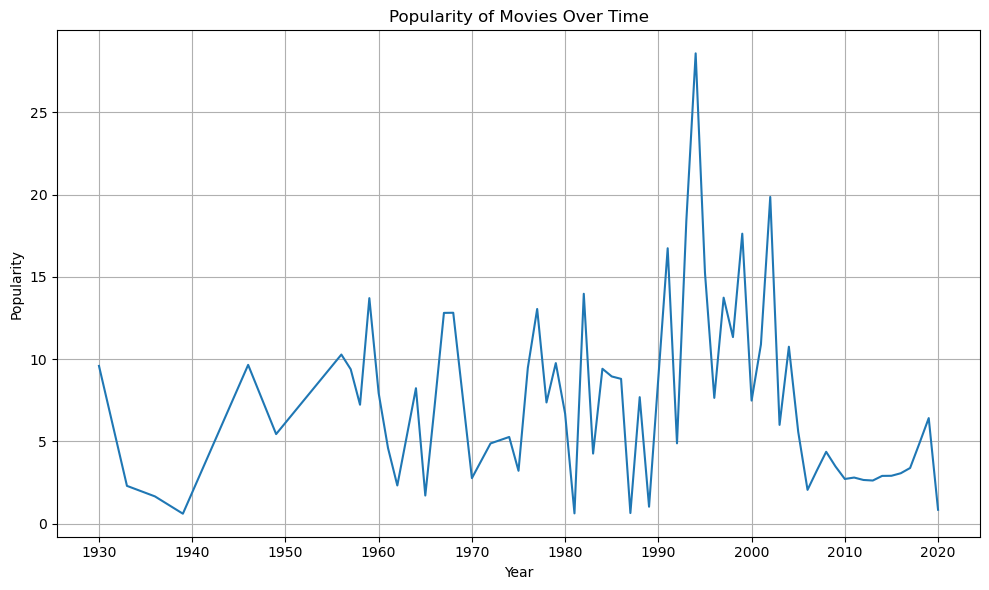

In [9]:
#Popularity of the movies
# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=movies_data, x='year', y='popularity', errorbar=None)
plt.title('Popularity of Movies Over Time')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
"""
The visualization showcases the trend of movie popularity over time.
1. Temporal Patterns: The line plot illustrates how the popularity of the movies have fluctuated over the years, 
providing insights into the temporal patterns of movie popularity. By examining the trend, we can identify periods of peak 
or declining popularity in the movie industry. This was in the late 1990s.
2. Historical Evolution: Analyzing the plot allows us to observe the historical evolution of movie popularity, 
highlighting changes in audience preferences, cinematic trends, and cultural influences over time. This can include shifts in 
genre preferences, advancements in filmmaking techniques, or the emergence of new genres or themes.
3. Impact of Time: Certain time periods may exhibit consistent trends in movie popularity, reflecting broader societal or 
cultural dynamics. For example, periods of economic prosperity or social change may correlate with increased interest in 
certain types of movies, resulting in higher popularity scores.
Overall, this visualization offers valuable insights into the temporal dynamics of movie popularity, helping stakeholders in 
the film industry understand audience preferences, track industry trends, and inform decision-making processes related to 
content creation, marketing strategies, and audience engagement.
"""

'\nThe visualization showcases the trend of movie popularity over time.\n1. Temporal Patterns: The line plot illustrates how the popularity of the movies have fluctuated over the years, \nproviding insights into the temporal patterns of movie popularity. By examining the trend, we can identify periods of peak \nor declining popularity in the movie industry. This was in the late 1990s.\n2. Historical Evolution: Analyzing the plot allows us to observe the historical evolution of movie popularity, \nhighlighting changes in audience preferences, cinematic trends, and cultural influences over time. This can include shifts in \ngenre preferences, advancements in filmmaking techniques, or the emergence of new genres or themes.\n3. Impact of Time: Certain time periods may exhibit consistent trends in movie popularity, reflecting broader societal or \ncultural dynamics. For example, periods of economic prosperity or social change may correlate with increased interest in \ncertain types of movie

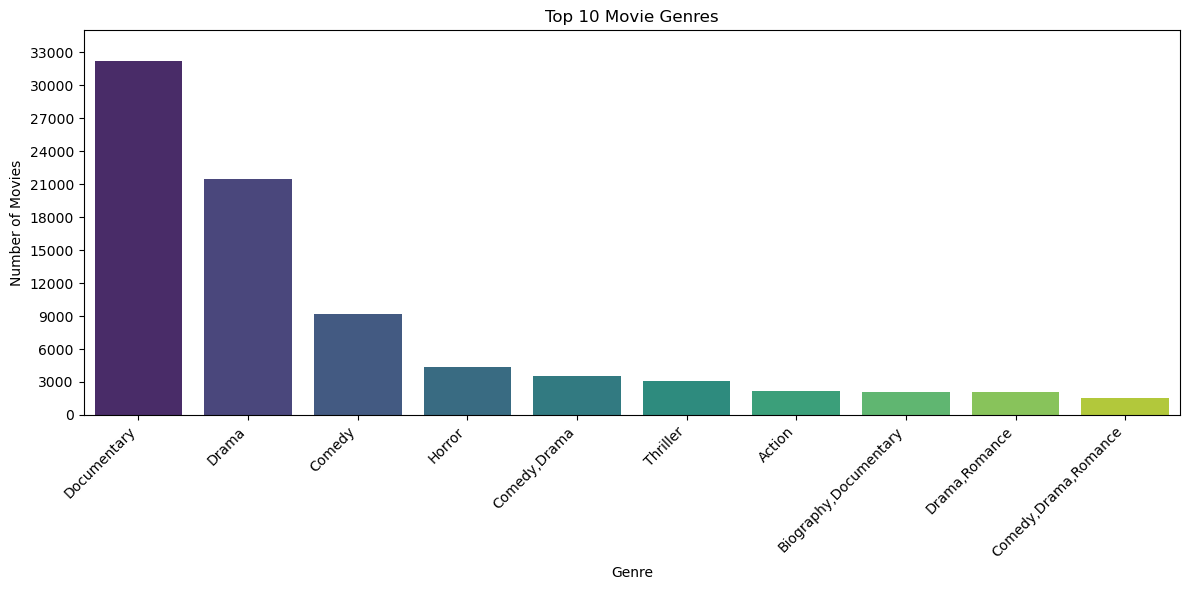

In [11]:
# Split genres into separate rows
genres = movies_data['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True)
movies_data_split = movies_data.drop('genres', axis=1).join(genres.rename('genre'))

# Get top 10 genres by count
top_10_genres = movies_data_split['genre'].value_counts().head(10).index

# Filter DataFrame for top 10 genres
movies_data_top_genres = movies_data_split[movies_data_split['genre'].isin(top_10_genres)]

# Plotting
plt.figure(figsize=(12, 6))
sns.countplot(data=movies_data_top_genres, x='genre', palette='viridis', order=top_10_genres)
plt.title('Top 10 Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.yticks(range(0, 35001, 3000))  # Adjust y-axis ticks up to 35000
plt.ylim(0, 35000)  # Set y-axis upper limit to 35000
plt.tight_layout()
plt.show()

In [12]:
"""
The visualization showcases the distribution of movies across the top 10 genres, providing insights into the most prevalent 
genres in the dataset while limiting the y-axis to a maximum of 35000 for better readability. 
Here are some observations and comments based on the plot:

1. Genre Distribution: The bar plot effectively displays the number of movies belonging to each of the top 10 genres, 
allowing us to observe the relative frequency of each genre within the dataset.

Top Genres: By focusing on the top 10 genres, the visualization highlights the most popular genres in the dataset. 
This information can be valuable for understanding audience preferences and trends in the movie industry.

2. Y-Axis Limit: Limiting the y-axis to 35000 ensures that the plot remains concise and visually appealing while 
still capturing the distribution of movies across genres. This prevents the plot from becoming overcrowded and maintains 
readability.

4. Readability: The plot's readability is enhanced by rotating the x-axis labels for better alignment and spacing,
allowing for easier interpretation of the genre labels.

5. Insights: The visualization enables stakeholders to quickly identify the dominant genres in the dataset and 
assess their relative popularity. This information can inform various decisions in areas such as content creation, marketing 
strategies, and audience targeting.

6. Overall, this visualization provides a clear and concise overview of the distribution of movies across the top genres, 
facilitating analysis and decision-making in the movie industry.
"""

"\nThe visualization showcases the distribution of movies across the top 10 genres, providing insights into the most prevalent \ngenres in the dataset while limiting the y-axis to a maximum of 35000 for better readability. \nHere are some observations and comments based on the plot:\n\n1. Genre Distribution: The bar plot effectively displays the number of movies belonging to each of the top 10 genres, \nallowing us to observe the relative frequency of each genre within the dataset.\n\nTop Genres: By focusing on the top 10 genres, the visualization highlights the most popular genres in the dataset. \nThis information can be valuable for understanding audience preferences and trends in the movie industry.\n\n2. Y-Axis Limit: Limiting the y-axis to 35000 ensures that the plot remains concise and visually appealing while \nstill capturing the distribution of movies across genres. This prevents the plot from becoming overcrowded and maintains \nreadability.\n\n4. Readability: The plot's rea

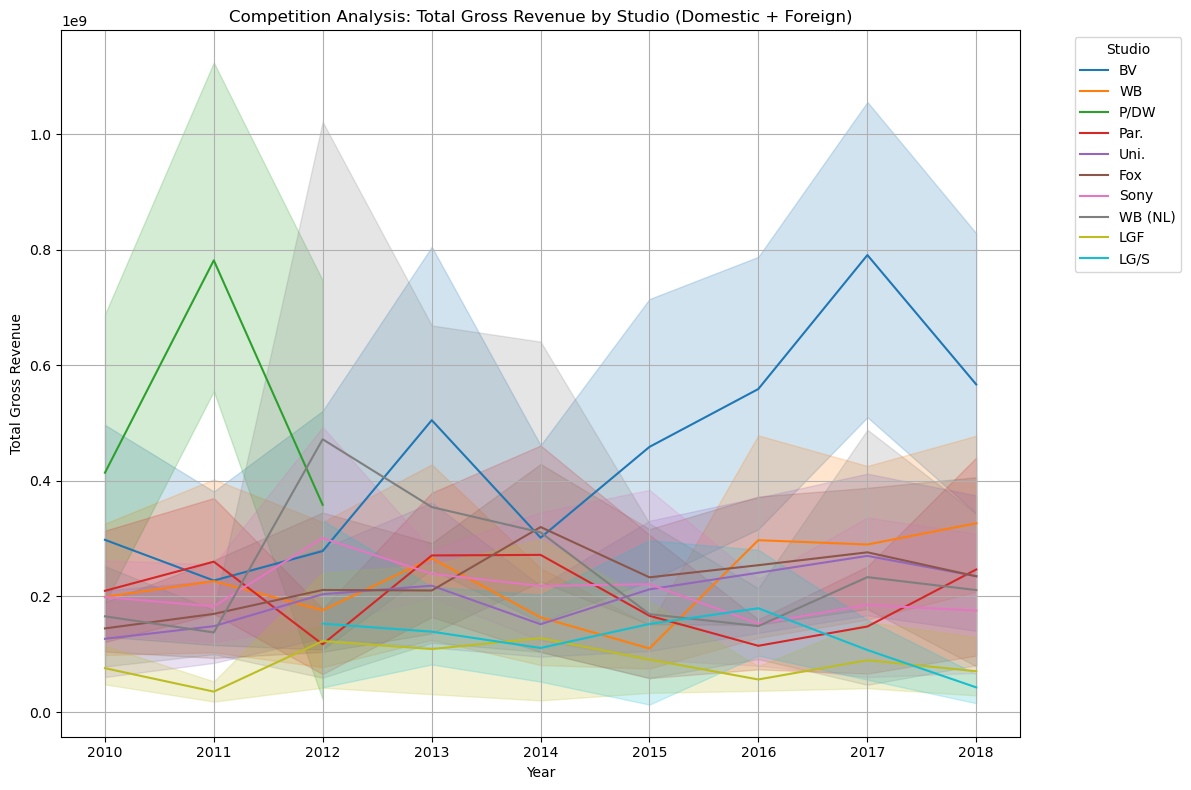

In [13]:
# Calculate total gross revenue by summing domestic and foreign gross
movies_data['total_gross'] = movies_data['domestic_gross'] + movies_data['foreign_gross']

# Group by studio and calculate total gross revenue for each studio
studio_total_gross = movies_data.groupby('studio')['total_gross'].sum().sort_values(ascending=False)

# Select the top 10 studios
top_10_studios = studio_total_gross.head(10).index

# Filter DataFrame for top 10 studios
movies_data_top_studios = movies_data[movies_data['studio'].isin(top_10_studios)]

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(data=movies_data_top_studios, x='year', y='total_gross', hue='studio')
plt.title('Competition Analysis: Total Gross Revenue by Studio (Domestic + Foreign)')
plt.xlabel('Year')
plt.ylabel('Total Gross Revenue')
plt.legend(title='Studio', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
"""
The visualization depicts the total gross revenue over time for the top 10 studios in the dataset, considering both domestic 
and foreign revenue. Here are some comments on the analysis:

1. Studio Performance Comparison: The plot allows for a direct comparison of the total gross revenue among the top 10 studios, 
providing insights into their competitive performance over the years. By examining the trends for each studio, stakeholders can 
identify which studios have consistently performed well and which ones have experienced fluctuations in revenue.

2. Revenue Trends: Observing the trend lines for each studio, we can discern patterns in their revenue generation over time. 
Some studios may exhibit steady growth, while others may show periods of rapid expansion followed by stagnation or decline. 
These trends can be indicative of various factors such as successful film releases, market dynamics, and strategic decisions 
made by the studios.

3. Industry Insights: Analyzing the total gross revenue of studios provides valuable insights into the overall health and 
dynamics of the movie industry. Trends in revenue generation reflect changes in consumer preferences, the popularity of 
certain genres, shifts in global markets, and the impact of technological advancements on distribution and consumption patterns.

4. Strategic Implications: The visualization can inform strategic decision-making for stakeholders within the movie industry. 
Studio executives, producers, investors, and distributors can use these insights to assess their competitive position, 
identify growth opportunities, and make informed decisions regarding content creation, marketing strategies, and resource 
allocation.

5. Long-term Perspective: By examining revenue trends over an extended period, stakeholders can gain a long-term perspective on 
the performance of the top studios. Understanding how revenue generation has evolved over time enables stakeholders to 
anticipate future trends, adapt to changing market conditions, and position themselves for success in the dynamic and 
competitive movie industry.

Overall, this competition analysis using total gross revenue offers valuable insights into the competitive landscape of the
movie industry, empowering stakeholders to make data-driven decisions and navigate the complexities of the market effectively.
"""

'\nThe visualization depicts the total gross revenue over time for the top 10 studios in the dataset, considering both domestic \nand foreign revenue. Here are some comments on the analysis:\n\n1. Studio Performance Comparison: The plot allows for a direct comparison of the total gross revenue among the top 10 studios, \nproviding insights into their competitive performance over the years. By examining the trends for each studio, stakeholders can \nidentify which studios have consistently performed well and which ones have experienced fluctuations in revenue.\n\n2. Revenue Trends: Observing the trend lines for each studio, we can discern patterns in their revenue generation over time. \nSome studios may exhibit steady growth, while others may show periods of rapid expansion followed by stagnation or decline. \nThese trends can be indicative of various factors such as successful film releases, market dynamics, and strategic decisions \nmade by the studios.\n\n3. Industry Insights: Analy

In [15]:
from IPython.display import display, Image

# Function to display Marvel Studios image
def display_marvel_studios_image():
    image_url = "https://cdn.marvel.com/u/prod/marvel/i/mg/5/f0/654bb0c29322f/detail.jpg"
    display(Image(url=image_url))

# Call the function to display the Marvel Studios image
display_marvel_studios_image()


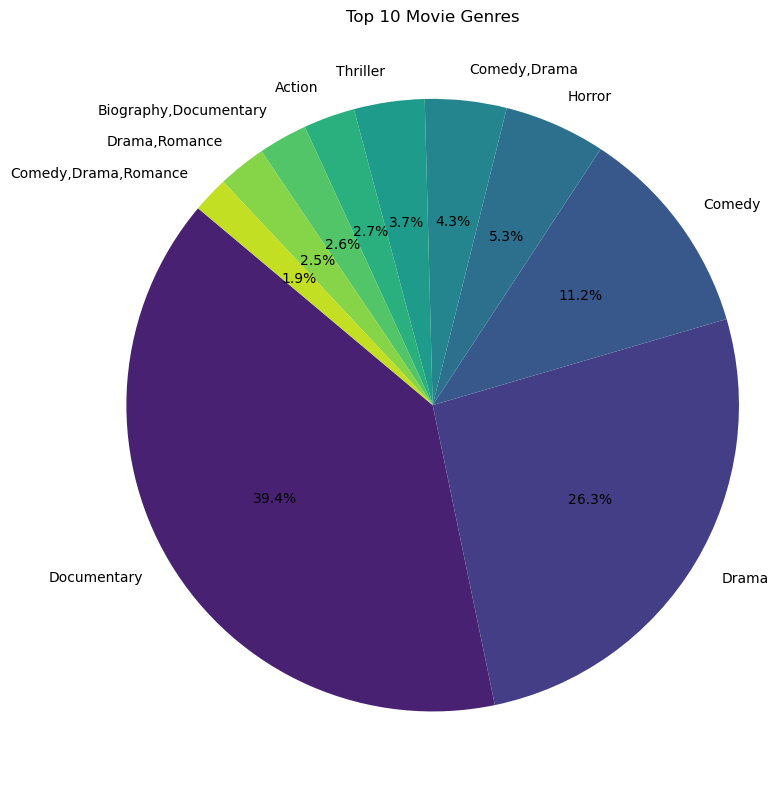

In [16]:
# Count the occurrences of each genre
genre_counts = movies_data_top_genres['genre'].value_counts()

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(genre_counts)))
plt.title('Top 10 Movie Genres')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()
